[ 1.76405235  0.40015721  0.97873798  2.2408932   1.86755799 -0.97727788
  0.95008842 -0.15135721 -0.10321885  0.4105985   0.14404357  1.45427351
  0.76103773  0.12167502  0.44386323  0.33367433  1.49407907 -0.20515826
  0.3130677  -0.85409574 -2.55298982  0.6536186   0.8644362  -0.74216502
  2.26975462 -1.45436567  0.04575852 -0.18718385  1.53277921  1.46935877]


<ipython-input-1-ffdb10c4d702>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x);


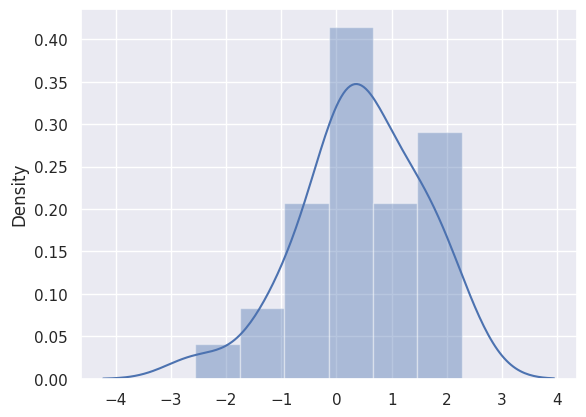

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

sns.set(color_codes=True)

np.random.seed(0)
x = np.random.normal(0, 1, size=30)
print(x)
sns.distplot(x)

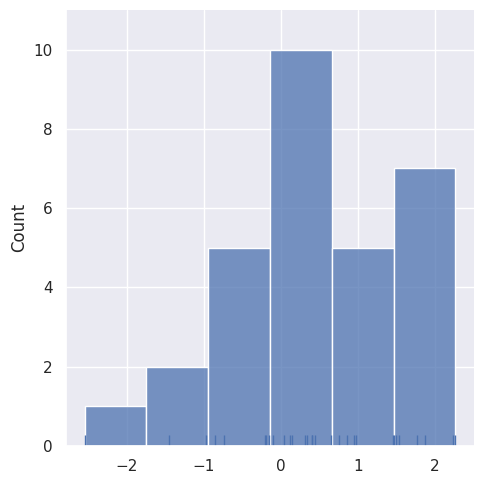

In [2]:
sns.displot(x,rug=True)

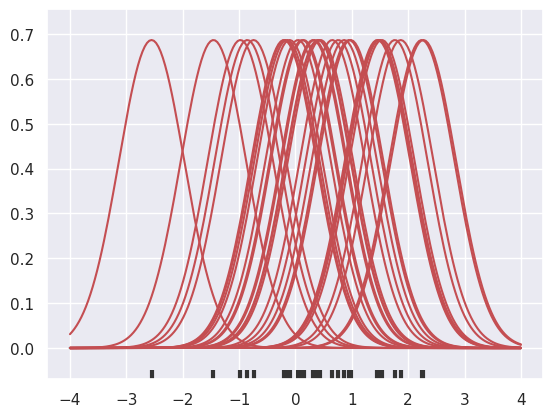

In [3]:
from scipy import stats

#x = np.random.normal(0, 1, size=30)
bandwidth = 1.06 * x.std() * x.size ** (-1 / 5.) # 표준편차
support = np.linspace(-4, 4, 200) # 최대, 최소

kernels = []
for x_i in x:
    kernel = stats.norm(x_i, bandwidth).pdf(support) # 확률밀도함수
    kernels.append(kernel)
    plt.plot(support, kernel, color="r")

sns.rugplot(x, color=".2", linewidth=3);

In [7]:
kernels

[array([2.82531523e-22, 5.60188742e-22, 1.10540472e-21, 2.17083956e-21,
        4.24281026e-21, 8.25275527e-21, 1.59758434e-20, 3.07785457e-20,
        5.90135673e-20, 1.12609521e-19, 2.13854223e-19, 4.04184840e-19,
        7.60259196e-19, 1.42318978e-18, 2.65144989e-18, 4.91613162e-18,
        9.07158247e-18, 1.66595044e-17, 3.04481263e-17, 5.53832631e-17,
        1.00257295e-16, 1.80622934e-16, 3.23854010e-16, 5.77889942e-16,
        1.02626724e-15, 1.81382451e-15, 3.19043236e-15, 5.58500142e-15,
        9.73008214e-15, 1.68705483e-14, 2.91112840e-14, 4.99934372e-14,
        8.54444985e-14, 1.45336496e-13, 2.46028114e-13, 4.14490196e-13,
        6.94965523e-13, 1.15966281e-12, 1.92583764e-12, 3.18292998e-12,
        5.23544946e-12, 8.57038497e-12, 1.39625956e-11, 2.26386990e-11,
        3.65305524e-11, 5.86651908e-11, 9.37614269e-11, 1.49137686e-10,
        2.36085908e-10, 3.71939414e-10, 5.83168170e-10, 9.09986382e-10,
        1.41317338e-09, 2.18411486e-09, 3.35950253e-09, 5.142732

In [5]:
from scipy.integrate import trapz # 각 구간 별 y에 대한 적분

density = np.sum(kernels, axis=0)
density.shape

(200,)

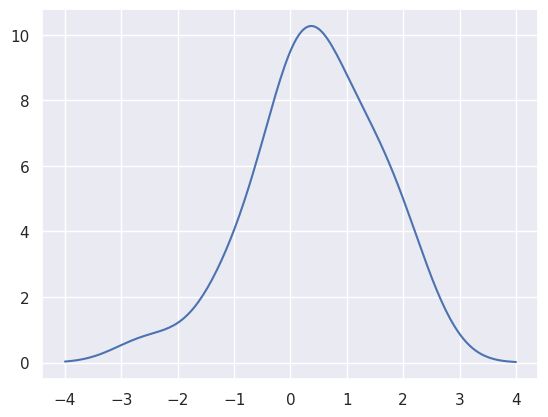

In [6]:
plt.plot(support, density)

In [8]:
trapz(density, support)

29.99071526337815

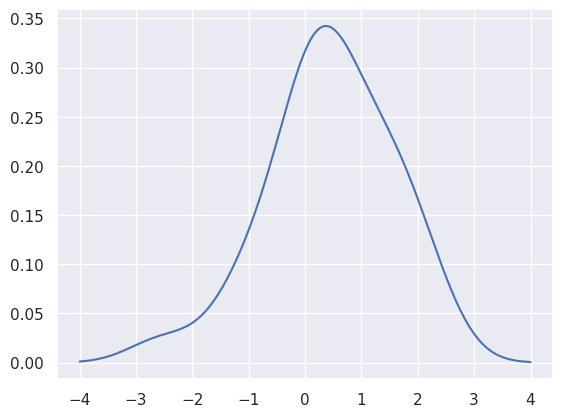

In [9]:
density /= trapz(density,support)
plt.plot(support, density)

<ipython-input-10-e50e9a97771b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x, shade=True)


<Axes: ylabel='Density'>

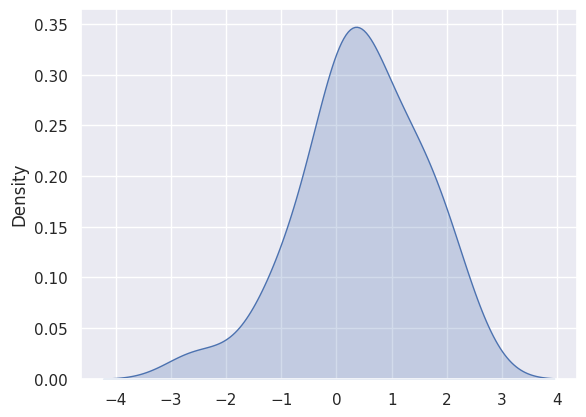

In [10]:
# seaborn의 kdeplot()으로 kde 곡선을 바로 구할 수 있다.
sns.kdeplot(x, shade=True)

<ipython-input-13-479b777ae7cc>:2: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=0.2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=0.2, label= "bw : 0.2")
<ipython-input-13-479b777ae7cc>:3: UserWarning: 

The `bw` parameter is deprecated in favor of `bw_method` and `bw_adjust`.
Setting `bw_method=2`, but please see the docs for the new parameters
and update your code. This will become an error in seaborn v0.13.0.

  sns.kdeplot(x, bw=2, label="bw : 2")


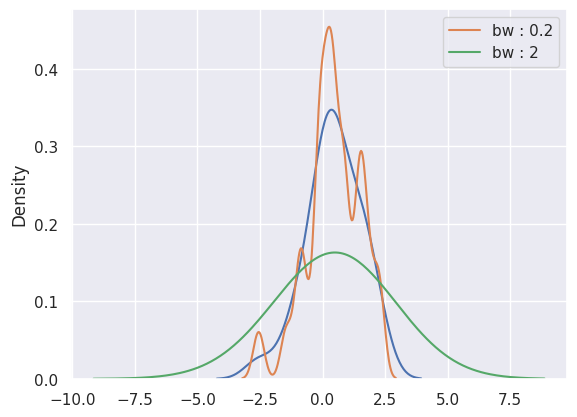

In [13]:
sns.kdeplot(x)
sns.kdeplot(x, bw=0.2, label= "bw : 0.2")
sns.kdeplot(x, bw=2, label="bw : 2")

plt.legend()
plt.show()

# 사이킷런의 MeanShift 사용하기

In [14]:
import numpy as np
from sklearn.datasets import make_blobs
from sklearn.cluster import MeanShift

X, y = make_blobs(n_samples=200, n_features=2, centers=3, 
                  cluster_std=0.8, random_state=0)

In [16]:
meanshift = MeanShift(bandwidth= 0.9)
cluster_labels = meanshift.fit_predict(X)
print("클러스터의 유형: {}".format(np.unique(cluster_labels)))

클러스터의 유형: [0 1 2 3 4 5 6 7]


In [20]:
import pandas as pd

sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1","x2"]
)

sample_data_df["cluster"] = cluster_labels
sample_data_df.head()

,x1,x2,cluster
0,-1.692427,3.622025,5
1,0.697940,4.428867,0
2,1.100228,4.606317,0
3,-1.448724,3.384245,1
4,1.214861,5.364896,4


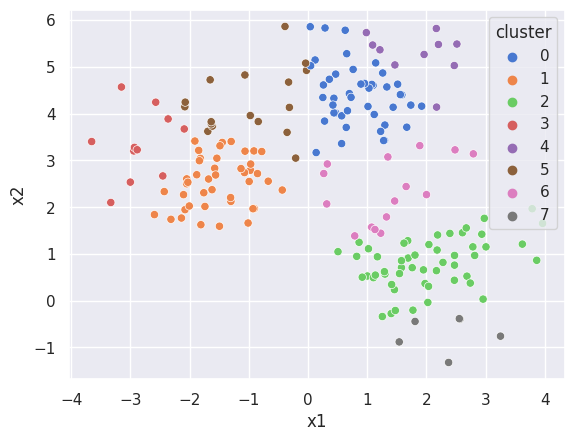

In [21]:
sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)

plt.show()

In [22]:
# bandwidth 증가
meanshift = MeanShift(bandwidth=1.0)
cluster_labels = meanshift.fit_predict(X)
print("클러스터의 유형: {}".format(np.unique(cluster_labels)))

클러스터의 유형: [0 1 2]


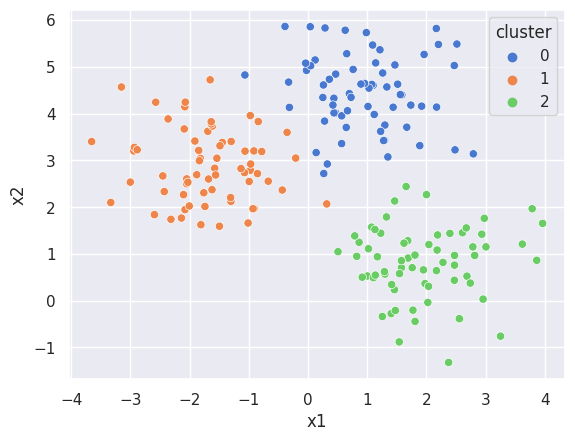

In [23]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [25]:
# 어떤 bandwidth가가 최적일까..? - estimate_bandwidth() 함수 사용해보기
from sklearn.cluster import estimate_bandwidth

best_bandwidth = estimate_bandwidth(X, quantile= 0.25)
best_bandwidth

1.6889636737559222

In [26]:
meanshift = MeanShift(bandwidth=best_bandwidth)
cluster_labels = meanshift.fit_predict(X)
print("클러스터의 유형: {}".format(np.unique(cluster_labels)))

클러스터의 유형: [0 1 2]


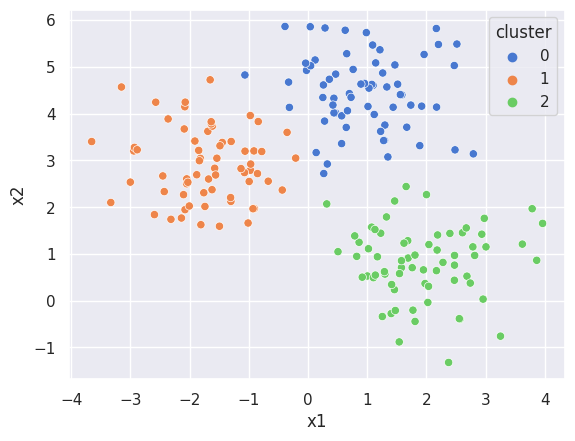

In [27]:
sample_data_df = pd.DataFrame(
    data=X,
    columns=["x1", "x2"]
)

sample_data_df['cluster'] = cluster_labels

sns.scatterplot(
    x='x1',
    y='x2',
    hue='cluster',
    palette='muted',
    data=sample_data_df
)
plt.show()

In [28]:
meanshift.cluster_centers_

array([[ 0.90425412,  4.43969979],
       [-1.63547329,  2.84588284],
       [ 1.84011231,  0.83840976]])

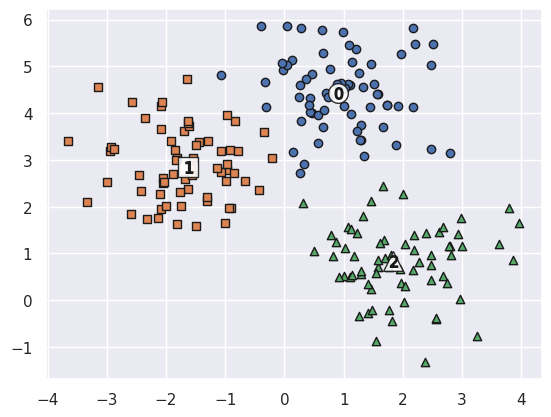

In [29]:
clusterDF = pd.DataFrame(data=X, columns=['ftr1', 'ftr2'])
clusterDF['target'] = y

clusterDF['meanshift_label']  = cluster_labels
centers = meanshift.cluster_centers_
unique_labels = np.unique(cluster_labels)
markers=['o', 's', '^', 'x', '*']

for label in unique_labels:
    label_cluster = clusterDF[clusterDF['meanshift_label']==label]
    center_x_y = centers[label]
    # 군집별로 다른 marker로 scatter plot 적용
    plt.scatter(x=label_cluster['ftr1'], y=label_cluster['ftr2'], edgecolor='k', 
                marker=markers[label] )
    
    # 군집별 중심 시각화
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=200, color='white',
                edgecolor='k', alpha=0.9, marker=markers[label])
    plt.scatter(x=center_x_y[0], y=center_x_y[1], s=70, color='k', edgecolor='k', 
                marker='$%d$' % label)
    
plt.show()